In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

c:\Users\Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

batch_size = 4

trainset = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True, num_workers=2
)

testset = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=batch_size, shuffle=False, num_workers=2
)

classes = (
    "plane",
    "car",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
)

Files already downloaded and verified
Files already downloaded and verified


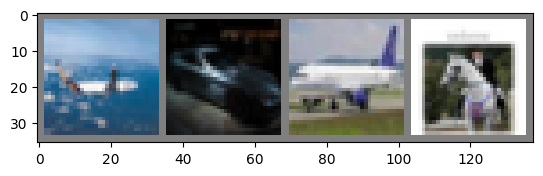

plane car   plane horse


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(" ".join(f"{classes[labels[j]]:5s}" for j in range(batch_size)))

In [5]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self, use_relu=True):
        super().__init__()
        self.use_relu = use_relu
        self.fc1 = nn.Linear(32*32*3, 110)
        self.fc2 = nn.Linear(110, 74)
        self.fc3 = nn.Linear(74, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        if self.use_relu:
            x = F.relu(x)
        x = self.fc2(x)
        if self.use_relu:
            x = F.relu(x)
        x = self.fc3(x)
        return x


net = Net()

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
num_epochs = 50
train_losses = []  # To store training losses
train_acc_list = []  # To store training accuracies
test_acc_list = []  # To store test accuracies

for epoch in range(num_epochs):
    running_loss = 0.0  # for mini-batch prints
    epoch_loss = 0.0  # for average epoch loss
    net.train()

    for i, (inputs, labels) in enumerate(trainloader, 0):
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        epoch_loss += loss.item()  # accumulate total loss for epoch

        # Print statistics every 2000 mini-batches
        if i % 2000 == 1999:
            print(
                f"[{epoch + 1}, {i + 1:5d}] mini-batch loss: {running_loss / 2000:.3f}"
            )
            running_loss = 0.0

    # Average loss for the epoch
    avg_loss = epoch_loss / len(trainloader)
    train_losses.append(avg_loss)

    # Training accuracy
    correct = 0
    total = 0
    net.eval()
    with torch.no_grad():
        for inputs, labels in trainloader:
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    train_acc = 100 * correct / total
    train_acc_list.append(train_acc)

    # Test accuracy
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_acc = 100 * correct / total
    test_acc_list.append(test_acc)


print("Finished Training")

[1,  2000] mini-batch loss: 1.938
[1,  4000] mini-batch loss: 1.716
[1,  6000] mini-batch loss: 1.656
[1,  8000] mini-batch loss: 1.631
[1, 10000] mini-batch loss: 1.593
[1, 12000] mini-batch loss: 1.581
[2,  2000] mini-batch loss: 1.510
[2,  4000] mini-batch loss: 1.477
[2,  6000] mini-batch loss: 1.467
[2,  8000] mini-batch loss: 1.482
[2, 10000] mini-batch loss: 1.434
[2, 12000] mini-batch loss: 1.455
[3,  2000] mini-batch loss: 1.380
[3,  4000] mini-batch loss: 1.389
[3,  6000] mini-batch loss: 1.397
[3,  8000] mini-batch loss: 1.389
[3, 10000] mini-batch loss: 1.358
[3, 12000] mini-batch loss: 1.377
[4,  2000] mini-batch loss: 1.313
[4,  4000] mini-batch loss: 1.292
[4,  6000] mini-batch loss: 1.337
[4,  8000] mini-batch loss: 1.328
[4, 10000] mini-batch loss: 1.332
[4, 12000] mini-batch loss: 1.329
[5,  2000] mini-batch loss: 1.240
[5,  4000] mini-batch loss: 1.277
[5,  6000] mini-batch loss: 1.282
[5,  8000] mini-batch loss: 1.271
[5, 10000] mini-batch loss: 1.281
[5, 12000] min

In [8]:
PATH = "./cifar_netq3.pth"
torch.save(net.state_dict(), PATH)

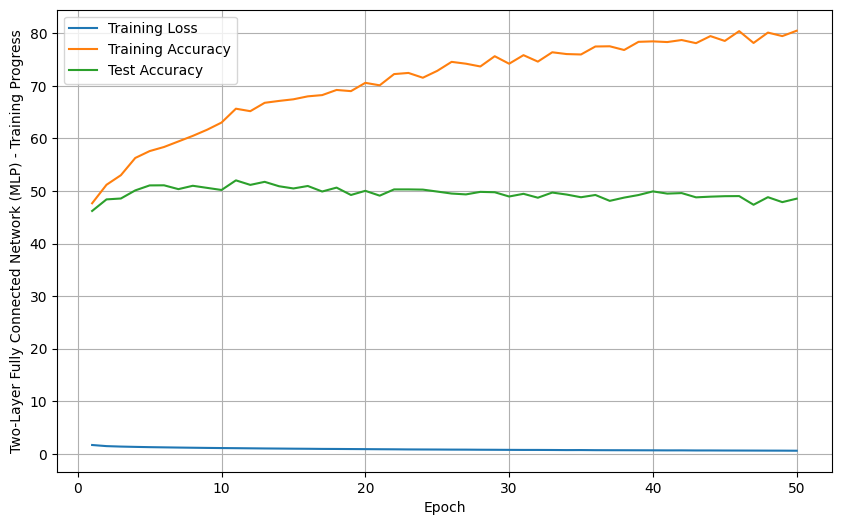

In [9]:
epochs = range(1, num_epochs + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label="Training Loss")
plt.plot(epochs, train_acc_list, label="Training Accuracy")
plt.plot(epochs, test_acc_list, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Two-Layer Fully Connected Network (MLP) - Training Progress")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
total_params = sum(p.numel() for p in net.parameters())
print(f"Total number of parameters: {total_params}")

Total number of parameters: 346994


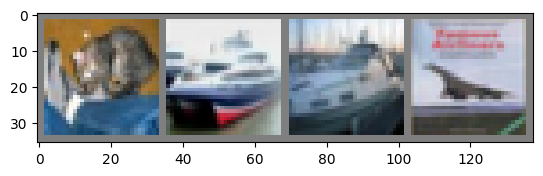

GroundTruth:  cat   ship  ship  plane


In [11]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print("GroundTruth: ", " ".join(f"{classes[labels[j]]:5s}" for j in range(4)))

In [12]:
net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

In [13]:
outputs = net(images)

In [14]:
_, predicted = torch.max(outputs, 1)

print("Predicted: ", " ".join(f"{classes[predicted[j]]:5s}" for j in range(4)))

Predicted:  cat   truck ship  bird 


In [15]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of the network on the 10000 test images: {100 * correct // total} %")

Accuracy of the network on the 10000 test images: 48 %


In [16]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f"Accuracy for class: {classname:5s} is {accuracy:.1f} %")

Accuracy for class: plane is 54.8 %
Accuracy for class: car   is 64.2 %
Accuracy for class: bird  is 36.4 %
Accuracy for class: cat   is 37.3 %
Accuracy for class: deer  is 40.8 %
Accuracy for class: dog   is 31.6 %
Accuracy for class: frog  is 53.6 %
Accuracy for class: horse is 51.6 %
Accuracy for class: ship  is 64.2 %
Accuracy for class: truck is 50.9 %


In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu
